In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, levy_stable
import scipy
from statsmodels.distributions.empirical_distribution import ECDF 
import pandas as pd
sns.set_style("darkgrid")
pi = np.pi

In [2]:
def _stable_random_variables(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha
    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables(alpha, beta, gamma, delta):
    Z = _stable_random_variables(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta

# CDF

## i

In [3]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
n = 2000000
Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
ecdf = ECDF(Xs)

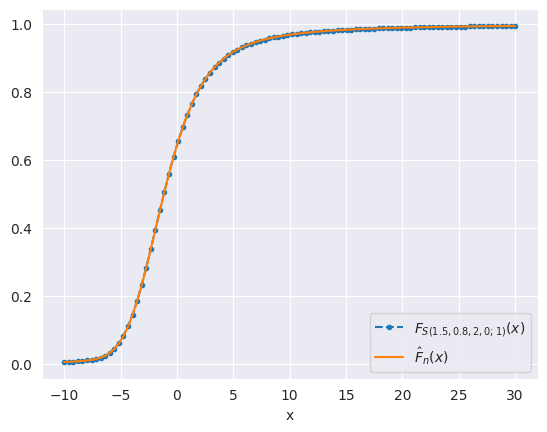

In [4]:
xs = np.linspace(-10,30,100)
Fx = ecdf(xs)
# plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = f"CDF S({alpha}, {beta}, {gamma}, {delta})")
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = "$F_{S(%a, %a, %a, %a; 1)}(x)$"%(alpha, beta, gamma, delta))

plt.plot(xs, Fx, label = "$\\hat F_n(x)$")
plt.legend()
plt.xlabel("x")
plt.savefig("raport_1/latex/images/stable_CDF.png")
plt.show()

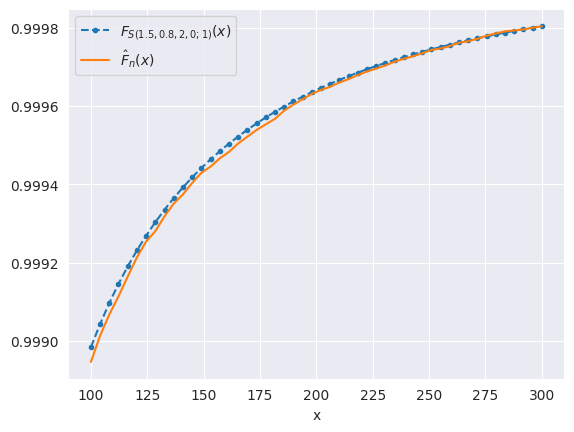

In [26]:
xs = np.linspace(100,300, 50)
Fx = ecdf(xs)
plt.plot(xs, levy_stable.cdf(xs, alpha, beta, delta, gamma), ".--", label = "$F_{S(%a, %a, %a, %a; 1)}(x)$"%(alpha, beta, gamma, delta))

plt.plot(xs, Fx, label = "$\\hat F_n(x)$")
plt.xlabel("x")
plt.legend()
plt.savefig("raport_1/latex/images/stable_CDF_large_x.png")
plt.show()

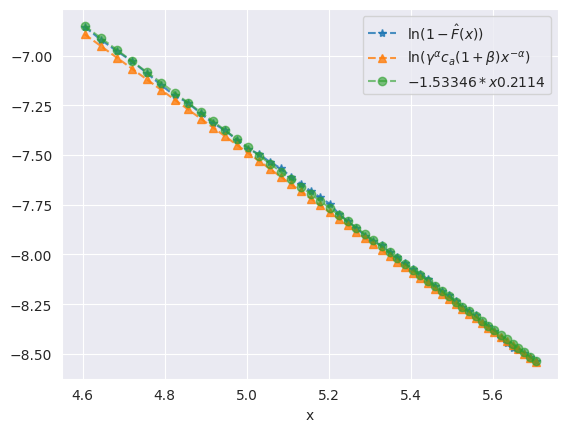

In [27]:
a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
c_a = np.sin(pi*alpha/2)*scipy.special.gamma(alpha)/pi
ys = gamma**alpha*c_a*(1+beta)*(xs)**(-alpha)

plt.plot(np.log(xs), np.log(1-Fx), "*--", label = "$\\ln(1- \\hat{F}(x))$", alpha = 0.8)
plt.plot(np.log(xs), np.log(ys) ,"^--", label = "$\\ln(\\gamma^\\alpha c_a (1+\\beta)x^{-\\alpha})$", alpha = 0.8)
plt.plot(np.log(xs), a*np.log(xs) + b,"o--", label = f"${round(a, 5)}*x {round(b, 5)}$", alpha = 0.6)

plt.xlabel("x")
plt.legend()
plt.savefig("raport_1/latex/images/compare_cdf_plots_type_1.png")
plt.show()

## ii

In [10]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
xs = np.linspace(10, 20, 20)
n = 5000


In [11]:
def sym_alpha_from_cdf(alpha, beta, gamma, delta, xs, n):
    Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
    ecdf = ECDF(Xs)
    Fx = ecdf(xs)
    a, b  =np.polyfit(np.log(xs), np.log(1-Fx), 1)
    return -a

In [12]:
ak = np.array([sym_alpha_from_cdf(alpha, beta, gamma, delta, xs, n) for _ in range(1000)])

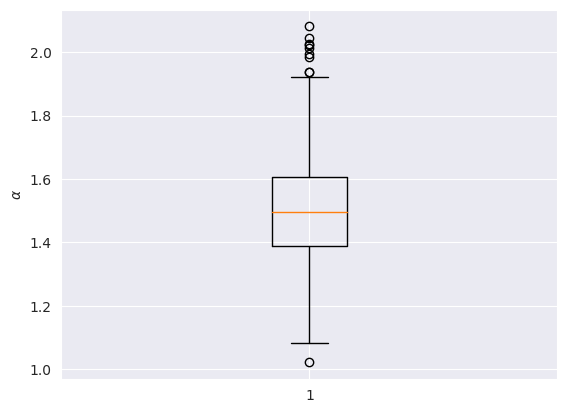

In [28]:
plt.boxplot([i for i in ak if not np.isnan(i)])
plt.ylabel("$\\alpha$")
plt.savefig("raport_1/latex/images/cdf_alpha_boxplot.png")
plt.show()

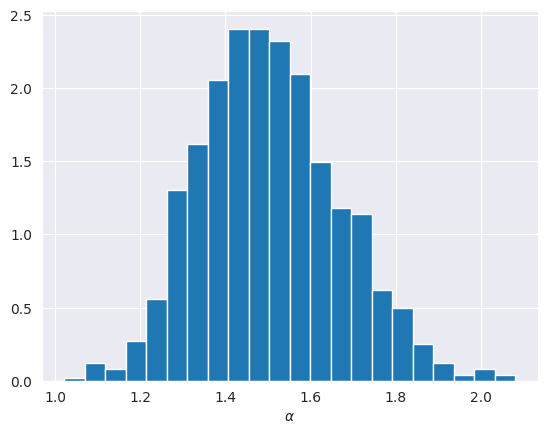

In [29]:
plt.hist(ak, bins = 22, density=True)
plt.xlabel("$\\alpha$")
plt.savefig("raport_1/latex/images/cdf_alpha_hist.png")
plt.show()

In [38]:
print(pd.DataFrame(ak).describe().T.to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &   count &      mean &       std &       min &     25\% &       50\% &     75\% &      max \\
\midrule
0 &  1000.0 &  1.503905 &  0.164877 &  1.020862 &  1.3874 &  1.494809 &  1.6061 &  2.08134 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_192795/4062590590.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame(ak).describe().T.to_latex())


## iii

In [24]:
def hita_map_MSE(alpha, beta, gamma, delta, xs, n, MC):
    ak = np.array([sym_alpha_from_cdf(alpha, beta, gamma, delta, xs, n) for _ in range(MC)])
    ak = ak[~np.isnan(ak)]
    return np.sum(np.power(np.array([alpha]*len(ak))-ak, 2)) / n

def hita_map_MAE(alpha, beta, gamma, delta, xs, n, MC):
    ak = np.array([sym_alpha_from_cdf(alpha, beta, gamma, delta, xs, n) for _ in range(MC)])
    ak = ak[~np.isnan(ak)]
    return np.sum(np.abs(np.array([alpha]*len(ak))-ak)) / n

In [ ]:
alpha = 1.5
beta = 0.8
gamma = 2
delta = 0
xs = np.linspace(10,20, 20)
n = 5000
MC = 100

alpha_n = 15
beta_n = 15
alpha_n = 2
beta_n = 2
alphas = np.linspace(0.01, 1.99, alpha_n)
betas = np.linspace(-0.99, 0.99, beta_n)

### alpha beta

In [ ]:
cdf_hist_MSE_data_alpha_beta = [[hita_map_MSE(alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]

In [ ]:
cdf_hist_MSE_data_alpha_beta_df = pd.DataFrame(cdf_hist_MSE_data_alpha_beta, columns=["MSE", "alpha", "beta"])
# cdf_hist_data_df
flights_MSE_alpha_beta = cdf_hist_MSE_data_alpha_beta_df.pivot("beta","alpha", "MSE")
sns.heatmap(flights_MSE_alpha_beta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
# plt.savefig("raport_1/latex/images/heatmap_cdf_MSE_alpha_beta.png")

### gamma delta

In [ ]:
cdf_hist_MAE_data_alpha_beta = [[hita_map_MAE(alpha, beta, gamma, delta, xs, n, MC), round(alpha,3), round(beta, 3)] for alpha in alphas for beta in betas]

In [ ]:
cdf_hist_MAE_data_alpha_beta_df = pd.DataFrame(cdf_hist_MAE_data_alpha_beta, columns=["MAE", "alpha", "beta"])
# cdf_hist_data_df
flights_MAE_alpha_beta = cdf_hist_MAE_data_alpha_beta_df.pivot("beta","alpha", "MAE")
sns.heatmap(flights_MAE_alpha_beta.sort_index(level=0, ascending=False),square=True, norm=LogNorm())
# plt.savefig("raport_1/latex/images/heatmap_cdf_MAE_alpha_beta.png")

# CF

## i

In [ ]:
n = 10000
dt = 0.05
ts = np.arange(-1.5, 1.5, dt)
tn = len(ts)
Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
Z = np.mean(Xs, 1)

In [5]:
def cf(t, alpha, beta, gamma, delta):
    if alpha == 1:
        return np.exp(-gamma*np.abs(t)*(1+1j*beta*2/pi*np.log(np.abs(t))*np.sign(t))+1j*delta*t)
    else:
        return np.exp(-gamma**alpha*np.abs(t)**alpha*(1-1j*beta*(np.tan(pi*alpha/2)*np.sign(t)))+1j*delta*t)

In [ ]:
plt.plot(ts, Z, ".-", label = "$\\hat \\varphi_n (t)$")
plt.plot(ts, cf(ts, alpha, beta, gamma, delta), "--", label = "$\\varphi (t)$")

plt.xlabel("t")
plt.legend()

plt.savefig("raport_1/latex/images/stable_CF.png")
plt.show()

In [ ]:
plt.plot(ts, Z, ".-", label = "$\\hat \\varphi_n (t)$")
plt.plot(ts, cf(ts, alpha, beta, gamma, delta), "--", label = "$\\varphi (t)$")

plt.xlabel("u")
plt.legend()

plt.savefig("raport_1/latex/images/stable_CDF_half.png")
plt.show()

In [ ]:
a, b  =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z))), 1)
plt.plot(np.log(ts), np.log(-np.log(np.abs(cf(ts, alpha, beta, gamma, delta)))), "--", label  = "$\ln(-\\ln |\\varphi_X(u)|)$")
plt.plot(np.log(ts), np.log(-np.log(np.abs(Z))), "*-", label = "$\ln(-\\ln |\\hat \\varphi_{X_n}(u)|)$")
plt.plot(np.log(ts), a*np.log(ts) + b,".-", label = "$%.4f*\\ln(u)+%.4f$"%(a,b), alpha = 0.4)
plt.xlabel("u")
plt.legend()
plt.savefig("raport_1/latex/images/compare_cf.png")
plt.show()

## ii

In [ ]:
n = 5000
dt = 0.05
ts = np.arange(0.2, 1, dt)
tn = len(ts)

In [ ]:
def sym_alpha_from_cf(alpha, beta, gamma, delta, ts, n):
    tn = len(ts)
    Xs = [stable_random_variables(alpha, beta, gamma, delta) for _ in range(n)]
    Xs = np.array([[stable_random_variables(alpha, beta, gamma, delta) for i in range(n)] for _ in range(tn)])
    Xs = np.exp(Xs*1j*ts.reshape(-1, 1))
    Z = np.mean(Xs, 1)
    a, b  =np.polyfit(np.log(ts), np.log(-np.log(np.abs(Z))), 1)
    return a

In [ ]:

ak_cf = np.array([sym_alpha_from_cf(alpha, beta, gamma, delta, ts, n) for _ in range(1000)])
ak_cf = ak_cf[~np.isnan(ak_cf)]
np.mean([i for i in ak_cf if not np.isnan(i)] )

In [ ]:
plt.boxplot(ak_cf[~np.isnan(ak_cf)])
plt.ylabel("$\\alpha$")
plt.savefig("raport_1/latex/images/cf_alpha_boxplot.png")
plt.show()

In [ ]:
plt.hist(ak_cf, bins = 15, density=True)
plt.xlabel("$\\alpha$")
plt.savefig("raport_1/latex/images/cf_alpha_hist.png")
plt.show()

In [ ]:
print(pd.DataFrame(ak_cf).describe().T.to_latex())